In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2016-10-03 15:04:25,291 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
ncf = NCFile('/data/readout/2016-10-03_150257_20_dB_dac.nc')

In [4]:
swa = ncf.SweepArray0

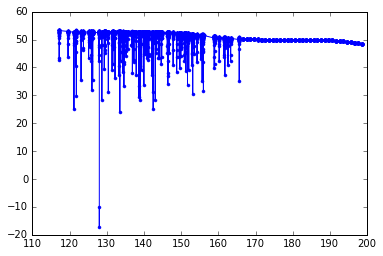

In [5]:
plot(swa.frequency_MHz,dB(swa.s21_point),'.-')

In [6]:
ssa = basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray1)

In [7]:
sweep_streams = [ssa.sweep_stream(k) for k in range(96)]

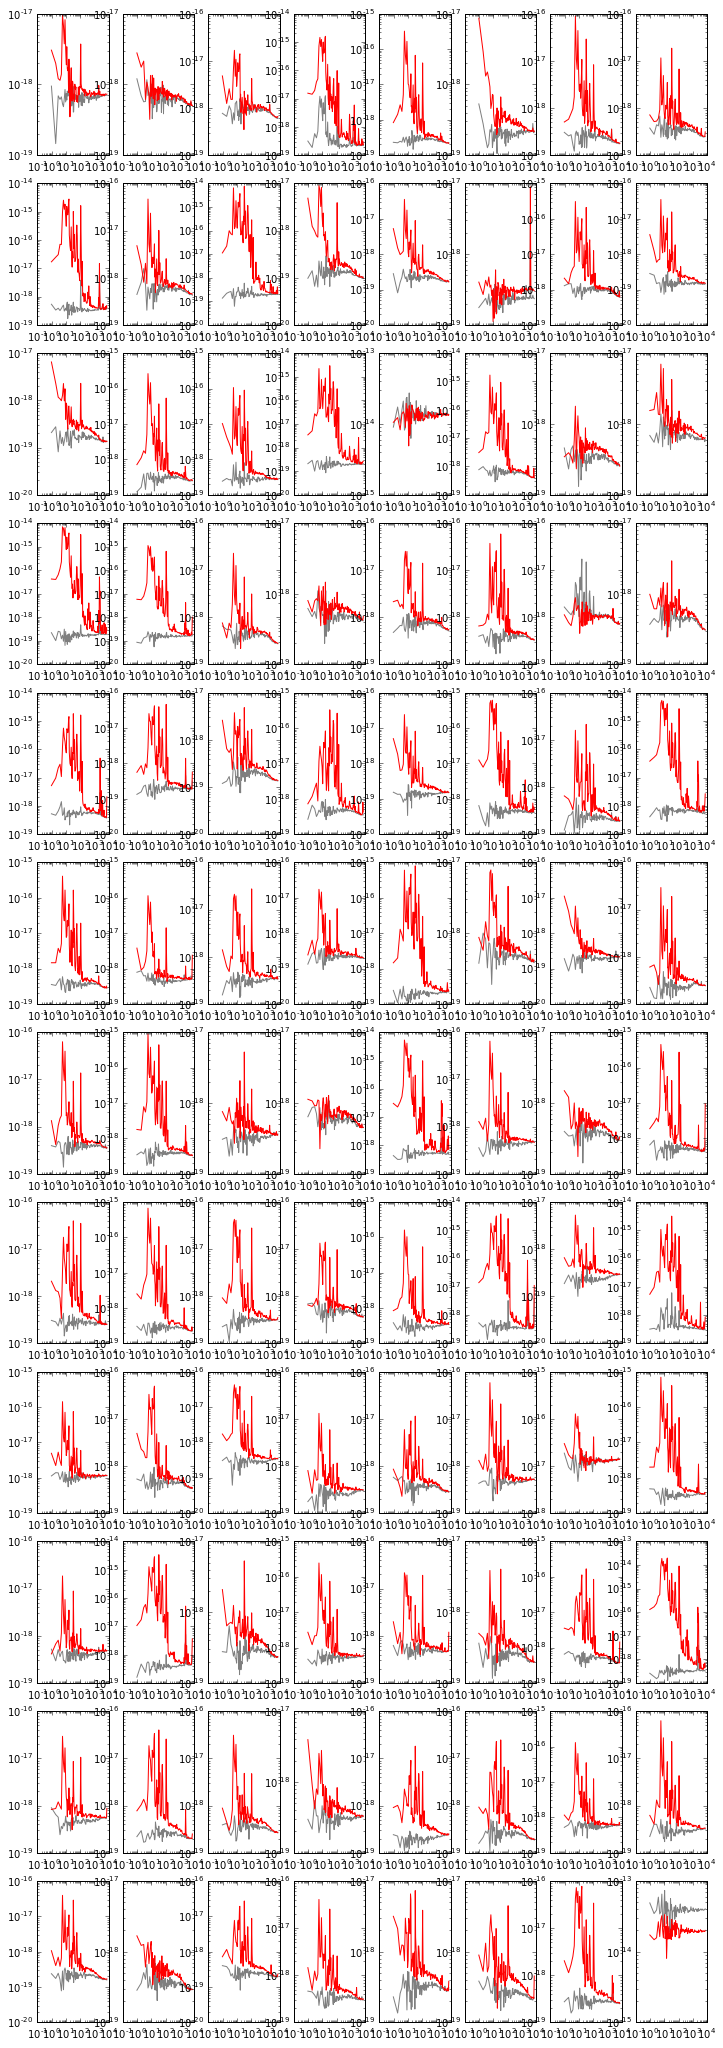

In [8]:
fig,axs = subplots(12,8,figsize=(12,36))
for k,ax in enumerate(axs.flatten()):
    ss = sweep_streams[k]
    ax.loglog(ss.S_frequency,ss.S_yy,'k',alpha=0.5)
    ax.loglog(ss.S_frequency,ss.S_xx,'r')

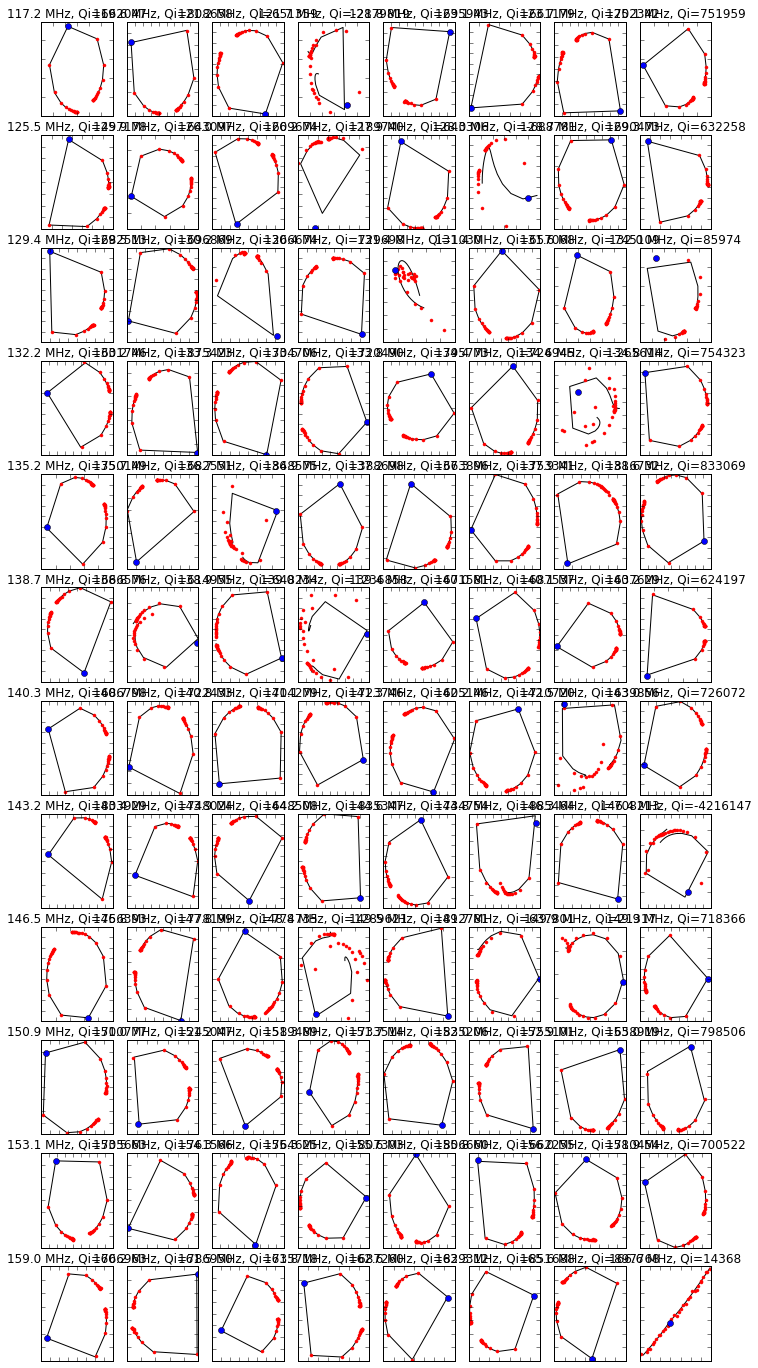

In [9]:
fig,axs = subplots(12,8,figsize=(12,24))
for k,ax in enumerate(axs.flatten()):
    ss = sweep_streams[k]
    model_s21 = ss.resonator.model.eval(params=ss.resonator.current_params,f=ss.sweep.frequency)
    ax.plot(model_s21.real,model_s21.imag,'k')
    ax.plot(ss.sweep.s21_point.real,ss.sweep.s21_point.imag,'r.')
    ax.plot(ss.stream.s21_point.real,ss.stream.s21_point.imag,'bo')
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.set_title('%.1f MHz, Qi=%.0f' % (ss.resonator.f_0/1e6, ss.resonator.Q_i))
